# Model Recovery 

In [10]:
%reload_ext autoreload
%autoreload 2

# Uncomment next line to enable interactive plots!
# %matplotlib inline
%matplotlib notebook
# %matplotlib widget

import numpy as np
from run_model_recovery import *
import multiprocessing as mp
import matplotlib.pyplot as plt

n_worker = int(mp.cpu_count()/2)
pool = mp.Pool(processes = n_worker)
    
# Parameter settings
n_trials = 1000

## 1. Model comparison

Just some examples here

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 5.38629, BIC = 15.2018 (done in 9.59 secs)
Model 2/8:     RW1972_epsi, Km = 2 ... AIC = 1259.85, BIC = 1269.67 (done in 2.68 secs)
Model 3/8:     LNP_softmax, Km = 2 ... AIC = 724.644, BIC = 734.459 (done in 4.7 secs)
Model 4/8:     LNP_softmax, Km = 4 ... AIC = 728.74, BIC = 748.371 (done in 6.34 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 978.565, BIC = 988.38 (done in 3.49 secs)
Model 6/8:     Hattori2019, Km = 3 ... AIC = 980.565, BIC = 995.288 (done in 5.44 secs)
Model 7/8:        Bari2019, Km = 3 ... AIC = 736.561, BIC = 751.284 (done in 9.76 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 559.616, BIC = 579.247 (done in 7.48 secs)


<IPython.core.display.Javascript object>


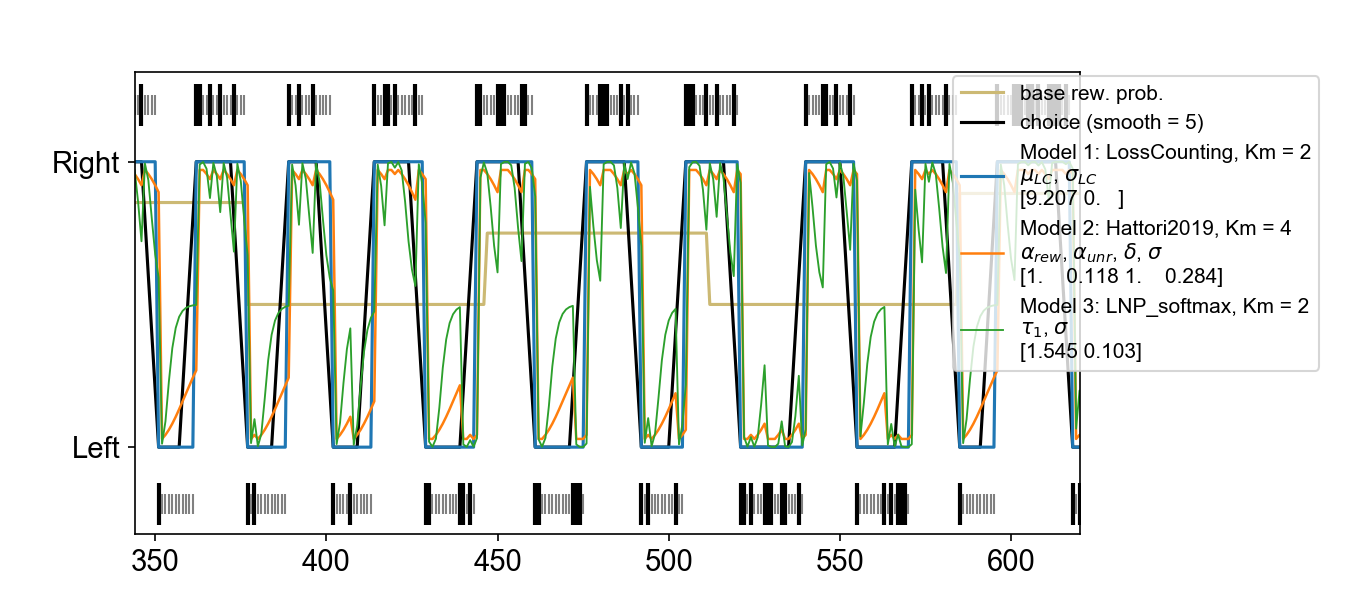

model  Km      AIC  log10_BF_AIC      BIC  log10_BF_BIC  \
1    LossCounting   2     5.39         -0.00    15.20         -0.00   
8     Hattori2019   4   559.62       -120.35   579.25       -122.48   
3     LNP_softmax   2   724.64       -156.18   734.46       -156.18   
4     LNP_softmax   4   728.74       -157.07   748.37       -159.21   
7        Bari2019   3   736.56       -158.77   751.28       -159.84   
5  RW1972_softmax   2   978.56       -211.32   988.38       -211.32   
6     Hattori2019   3   980.56       -211.76   995.29       -212.82   
2     RW1972_epsi   2  1259.85       -272.40  1269.67       -272.40   

                                        para_notation  \
1                           $\mu_{LC}$, $\sigma_{LC}$   
8  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
3                                  $\tau_1$, $\sigma$   
4          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
7                  $\alpha_{rew}$, $\delta$, $\sigma$   
5                            $\alpha_{rew}$, $\sigma$   
6            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   
2                          $\alpha_{rew}$, $\epsilon$   

                    para_fitted  
1                  [9.207, 0.0]  
8      [1.0, 0.118, 1.0, 0.284]  
3                [1.545, 0.103]  
4  [1.511, 1.911, 0.976, 0.104]  
7          [0.046, 0.445, 0.01]  
5                  [1.0, 0.024]  
6            [0.828, 1.0, 0.01]  
2                [0.536, 0.643]

<IPython.core.display.Javascript object>


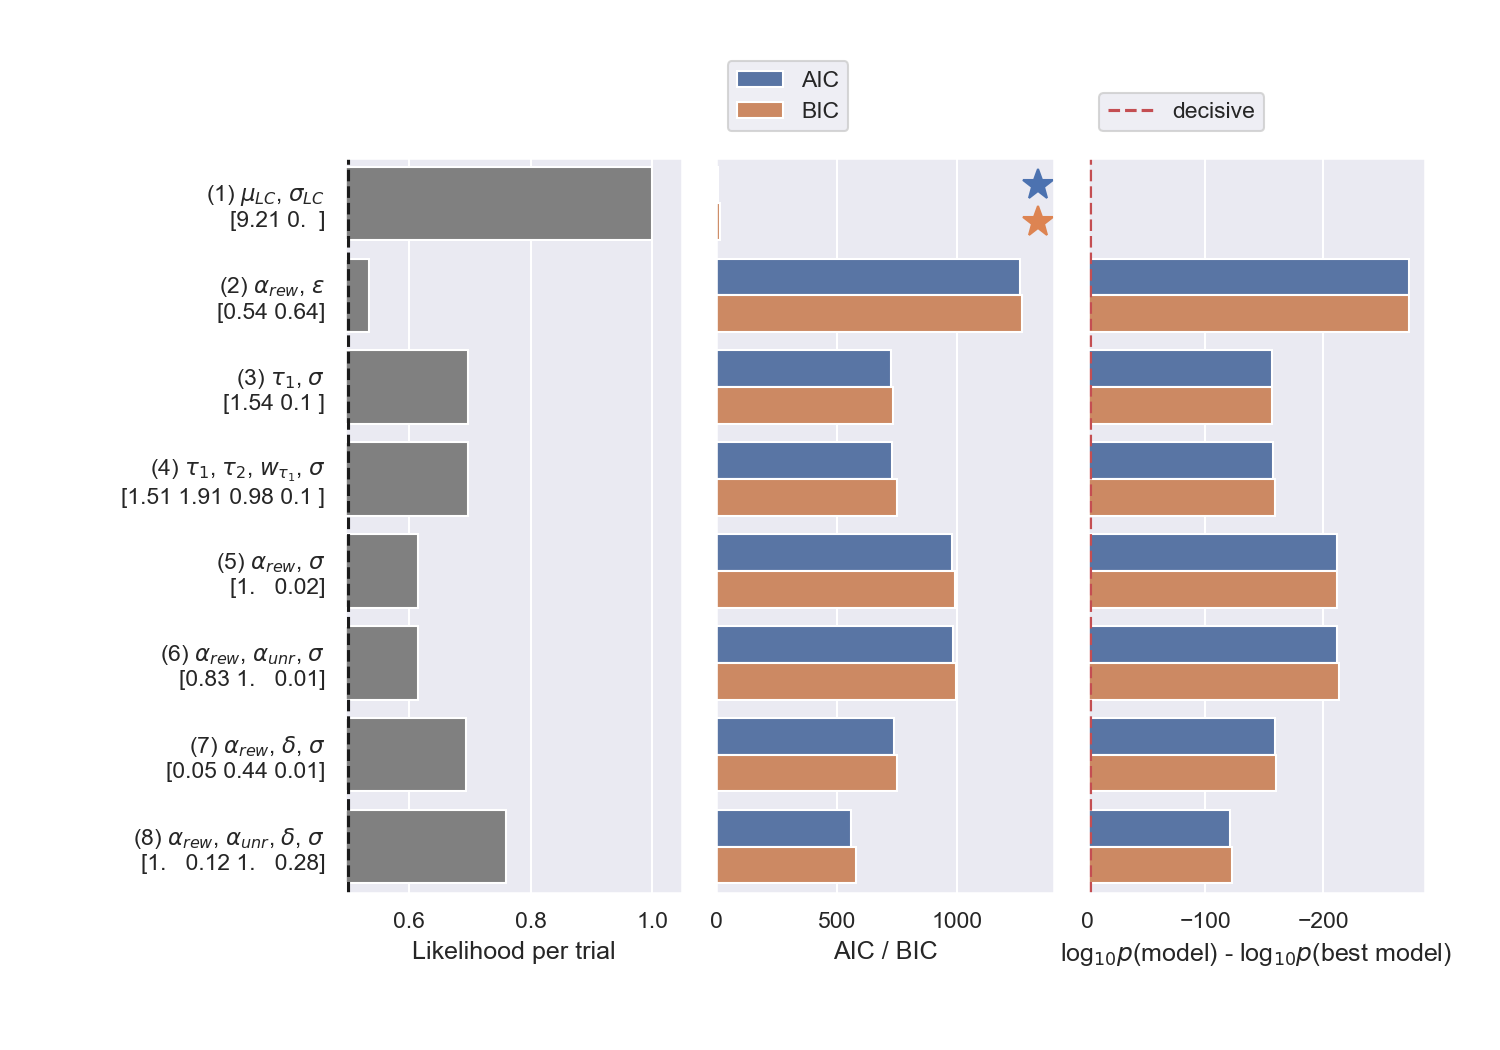

In [2]:
fake_data = generate_fake_data('LossCounting', ['loss_count_threshold_mean','loss_count_threshold_std'], [10,0])
model_comparison = BanditModelComparison(fake_data)
model_comparison.fit(pool = pool, plot_predictive=[1,2,3])  # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1347.49, BIC = 1357.31 (done in 5 secs)
Model 2/8:     RW1972_epsi, Km = 2 ... AIC = 1226.75, BIC = 1236.56 (done in 3.58 secs)
Model 3/8:     LNP_softmax, Km = 2 ... AIC = 1305.3, BIC = 1315.12 (done in 2.57 secs)
Model 4/8:     LNP_softmax, Km = 4 ... AIC = 1215.73, BIC = 1235.36 (done in 8.05 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1179.48, BIC = 1189.29 (done in 3.54 secs)
Model 6/8:     Hattori2019, Km = 3 ... AIC = 1180.15, BIC = 1194.87 (done in 4.2 secs)
Model 7/8:        Bari2019, Km = 3 ... AIC = 1181.48, BIC = 1196.2 (done in 5.12 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1182.15, BIC = 1201.78 (done in 7.44 secs)


<IPython.core.display.Javascript object>


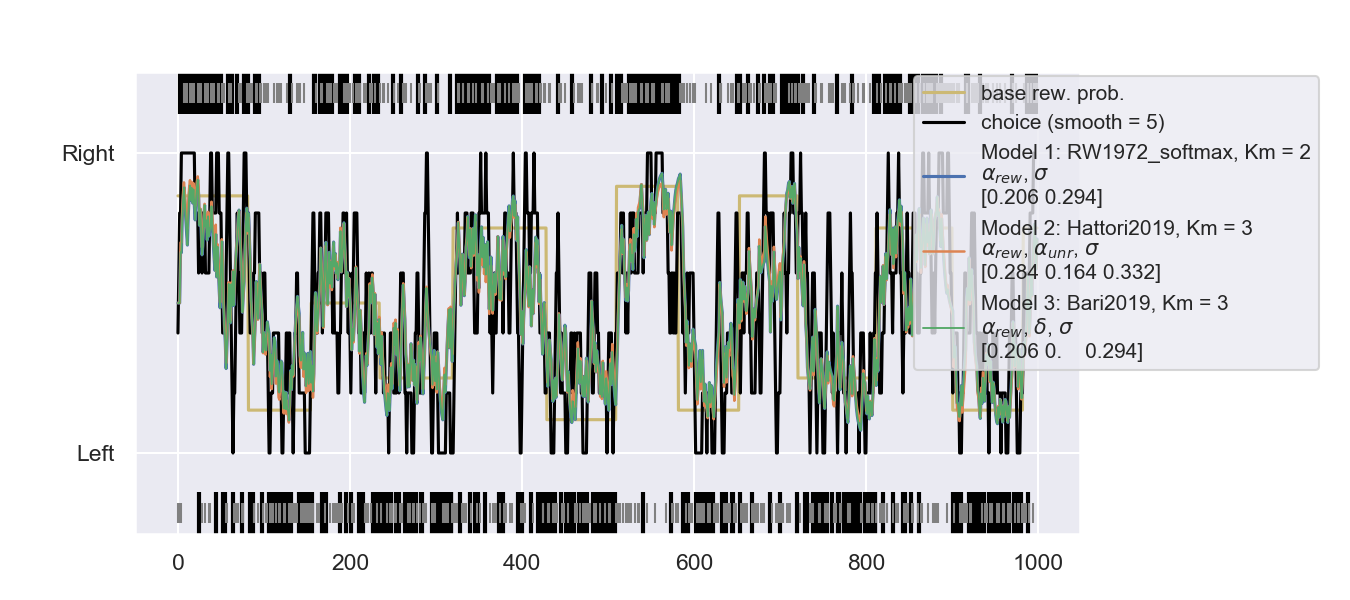

model  Km      AIC  log10_BF_AIC      BIC  log10_BF_BIC  \
5  RW1972_softmax   2  1179.48         -0.00  1189.29         -0.00   
6     Hattori2019   3  1180.15         -0.15  1194.87         -1.21   
7        Bari2019   3  1181.48         -0.43  1196.20         -1.50   
8     Hattori2019   4  1182.15         -0.58  1201.78         -2.71   
4     LNP_softmax   4  1215.73         -7.87  1235.36        -10.00   
2     RW1972_epsi   2  1226.75        -10.27  1236.56        -10.27   
3     LNP_softmax   2  1305.30        -27.32  1315.12        -27.32   
1    LossCounting   2  1347.49        -36.48  1357.31        -36.48   

                                        para_notation  \
5                            $\alpha_{rew}$, $\sigma$   
6            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   
7                  $\alpha_{rew}$, $\delta$, $\sigma$   
8  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
4          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
2                          $\alpha_{rew}$, $\epsilon$   
3                                  $\tau_1$, $\sigma$   
1                           $\mu_{LC}$, $\sigma_{LC}$   

                    para_fitted  
5                [0.206, 0.294]  
6         [0.284, 0.164, 0.332]  
7           [0.206, 0.0, 0.294]  
8    [0.284, 0.164, 0.0, 0.332]  
4  [1.209, 7.695, 0.239, 0.307]  
2                [0.159, 0.664]  
3                  [0.001, 1.0]  
1                 [3.854, 10.0]

<IPython.core.display.Javascript object>


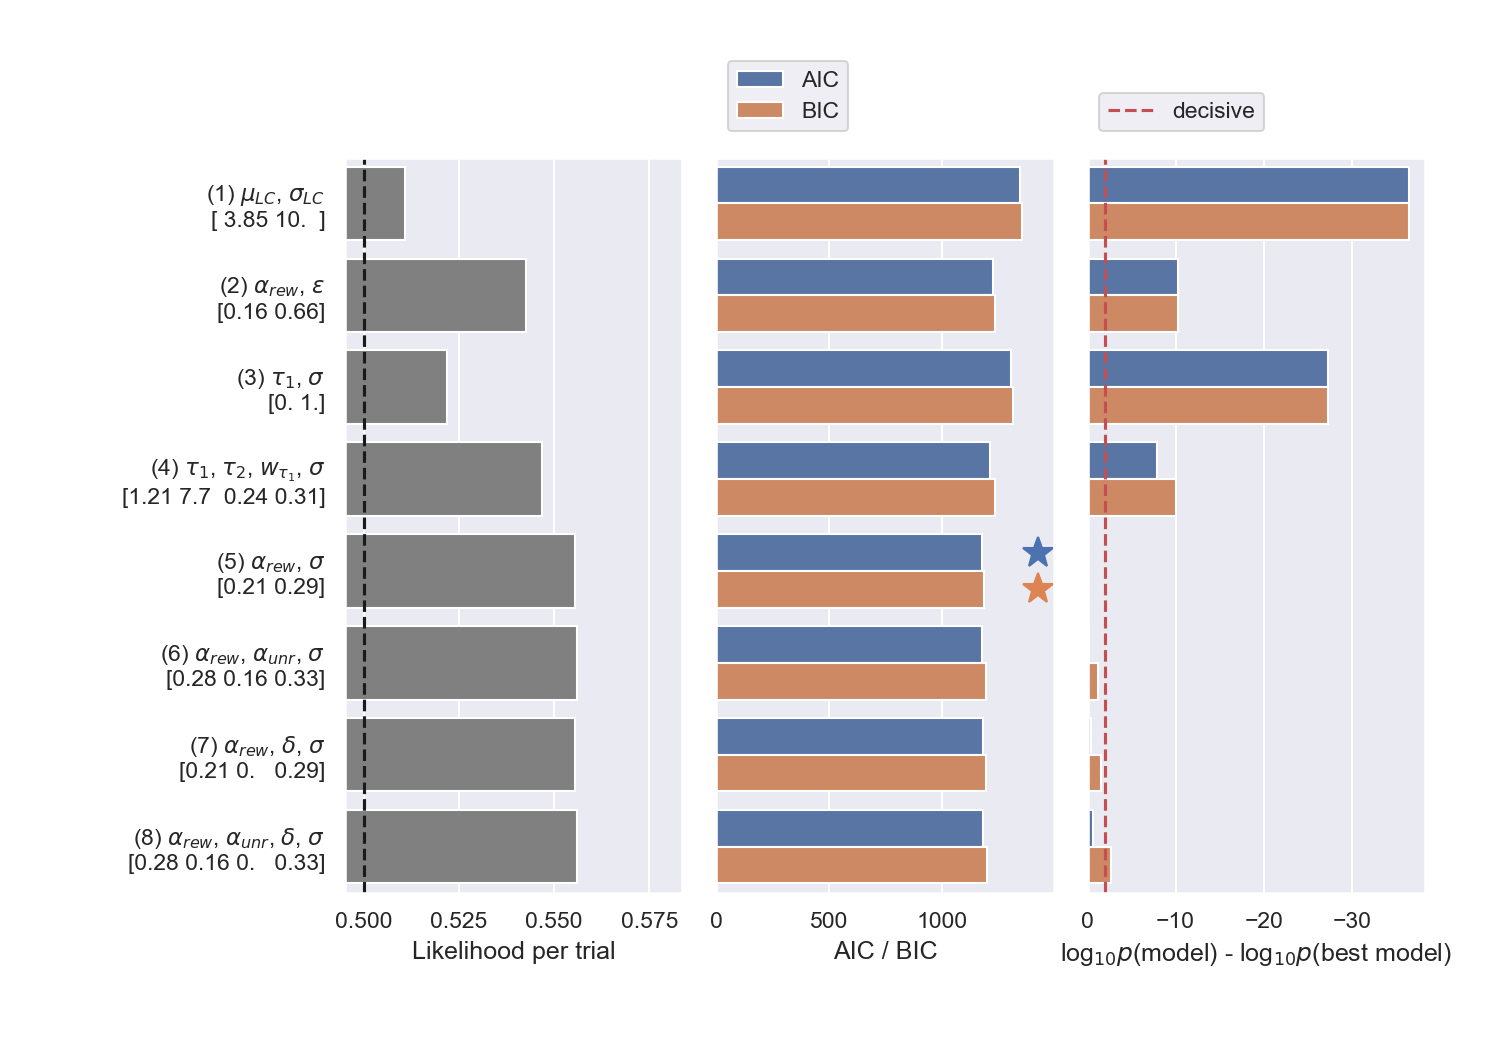

In [4]:
fake_data = generate_fake_data('RW1972_softmax', ['learn_rate_rew','softmax_temperature'], [0.2,0.3])
model_comparison = BanditModelComparison(fake_data)
model_comparison.fit(pool = pool, plot_predictive=[1,2,3]) # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1290.69, BIC = 1300.51 (done in 5.18 secs)
Model 2/8:     RW1972_epsi, Km = 2 ... AIC = 1078.59, BIC = 1088.41 (done in 3.58 secs)
Model 3/8:     LNP_softmax, Km = 2 ... AIC = 820.072, BIC = 829.887 (done in 3.76 secs)
Model 4/8:     LNP_softmax, Km = 4 ... AIC = 822.053, BIC = 841.684 (done in 9.58 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 947.254, BIC = 957.069 (done in 3.72 secs)
Model 6/8:     Hattori2019, Km = 3 ... AIC = 949.13, BIC = 963.854 (done in 5.73 secs)
Model 7/8:        Bari2019, Km = 3 ... AIC = 824.446, BIC = 839.169 (done in 8.76 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 822.101, BIC = 841.732 (done in 7.45 secs)


<IPython.core.display.Javascript object>


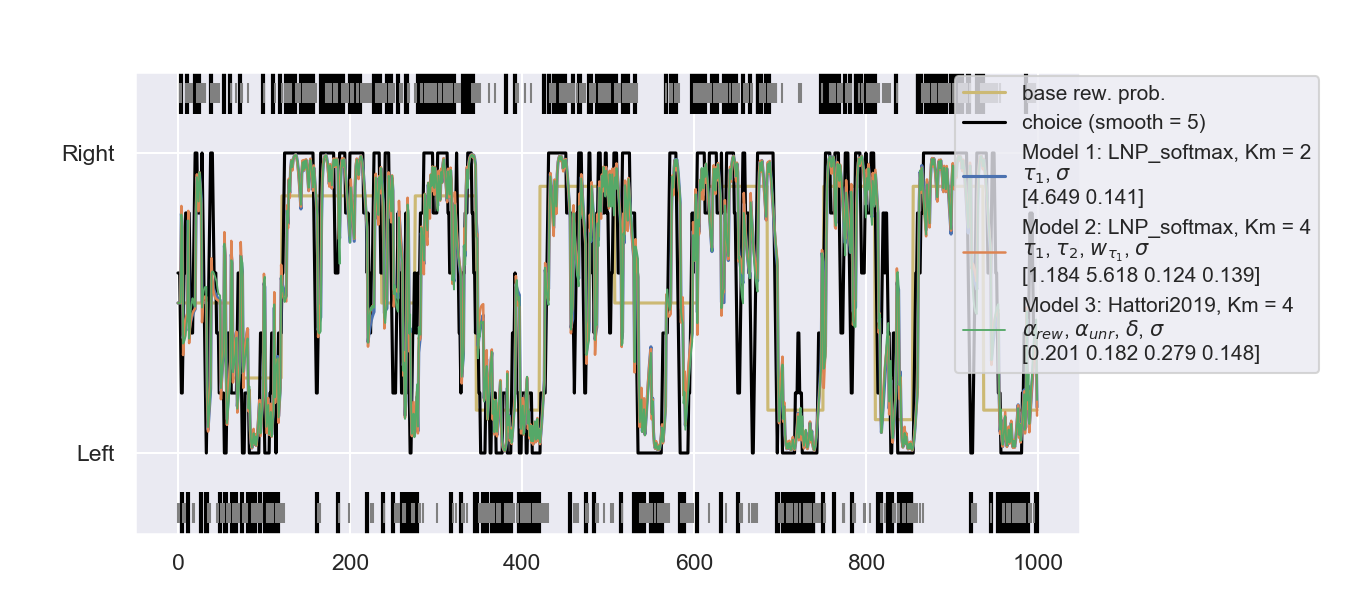

model  Km      AIC  log10_BF_AIC      BIC  log10_BF_BIC  \
3     LNP_softmax   2   820.07         -0.00   829.89         -0.00   
4     LNP_softmax   4   822.05         -0.43   841.68         -2.56   
8     Hattori2019   4   822.10         -0.44   841.73         -2.57   
7        Bari2019   3   824.45         -0.95   839.17         -2.02   
5  RW1972_softmax   2   947.25        -27.62   957.07        -27.62   
6     Hattori2019   3   949.13        -28.02   963.85        -29.09   
2     RW1972_epsi   2  1078.59        -56.14  1088.41        -56.14   
1    LossCounting   2  1290.69       -102.19  1300.51       -102.19   

                                        para_notation  \
3                                  $\tau_1$, $\sigma$   
4          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
8  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
7                  $\alpha_{rew}$, $\delta$, $\sigma$   
5                            $\alpha_{rew}$, $\sigma$   
6            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   
2                          $\alpha_{rew}$, $\epsilon$   
1                           $\mu_{LC}$, $\sigma_{LC}$   

                    para_fitted  
3                [4.649, 0.141]  
4  [1.184, 5.618, 0.124, 0.139]  
8  [0.201, 0.182, 0.279, 0.148]  
7         [0.024, 0.156, 0.019]  
5                [0.138, 0.115]  
6          [0.12, 0.149, 0.104]  
2                [0.152, 0.452]  
1                [13.103, 10.0]

<IPython.core.display.Javascript object>


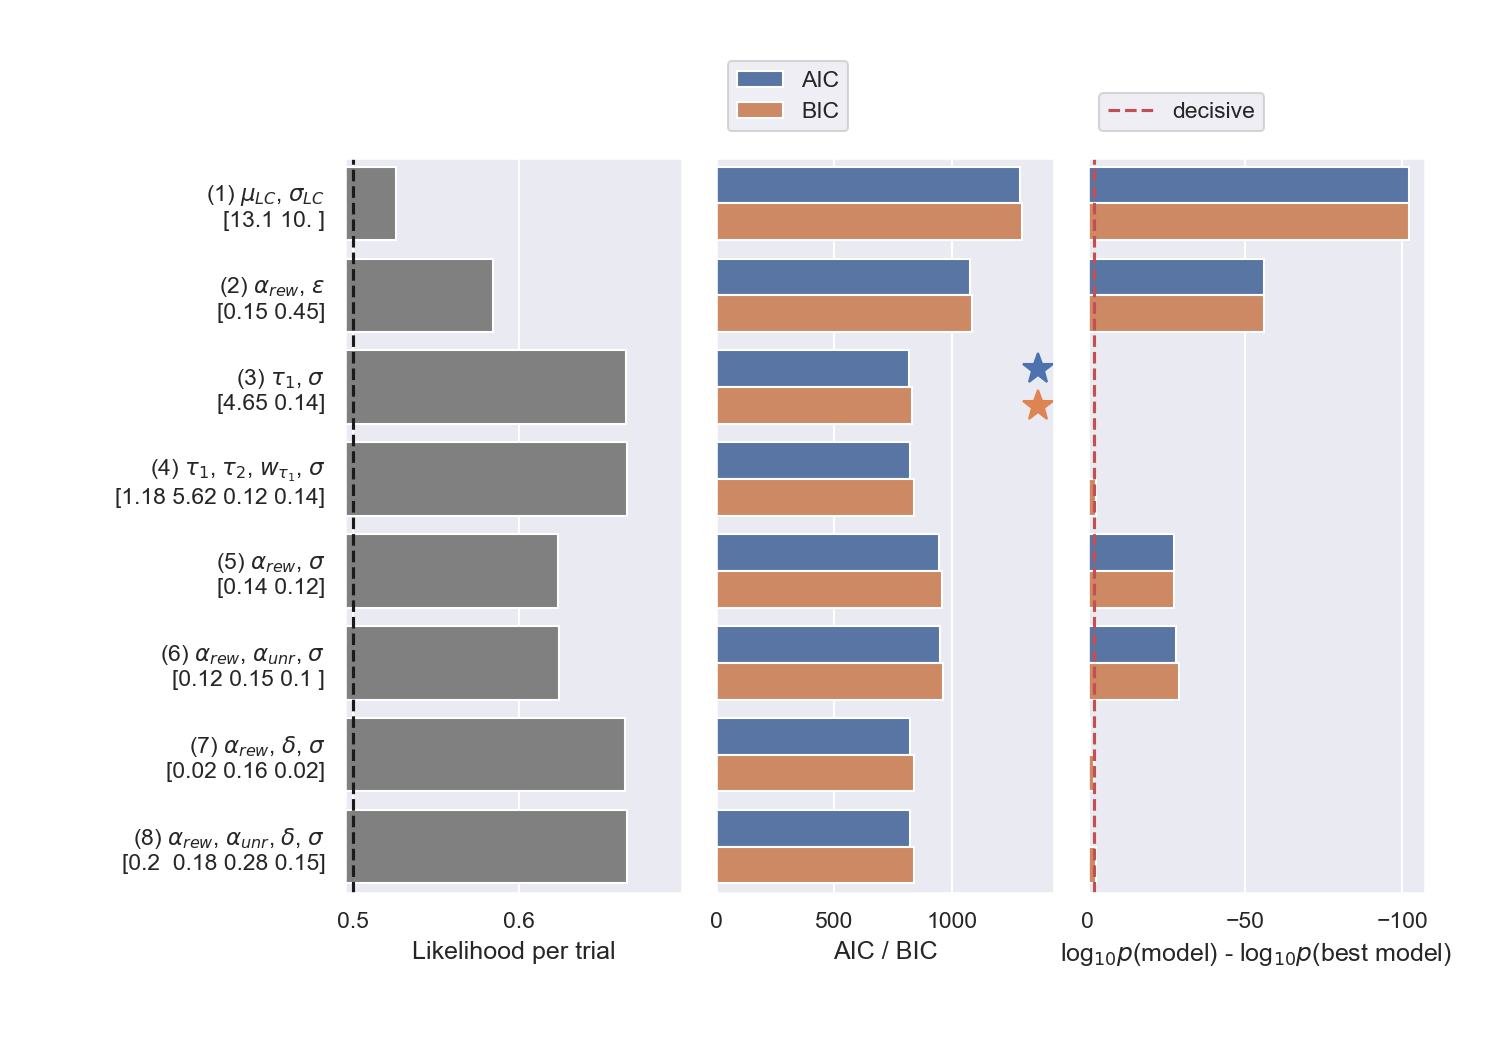

In [5]:
fake_data = generate_fake_data('Hattori2019', ['learn_rate_rew','learn_rate_unrew', 'forget_rate','softmax_temperature'], 
                                                      [0.4, 0.2, 0.2, 0.23], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(fake_data)
model_comparison.fit(pool = pool, plot_predictive=[1,2,3])  # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

Try to fit the behavior of some special foragers

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1402.49, BIC = 1412.3 (done in 11.7 secs)
Model 2/8:     RW1972_epsi, Km = 2 ... AIC = 1390.08, BIC = 1399.9 (done in 3.58 secs)
Model 3/8:     LNP_softmax, Km = 2 ... AIC = 1388.94, BIC = 1398.75 (done in 2.24 secs)
Model 4/8:     LNP_softmax, Km = 4 ... AIC = 1392.94, BIC = 1412.57 (done in 4.13 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1388.52, BIC = 1398.33 (done in 1.83 secs)
Model 6/8:     Hattori2019, Km = 3 ... AIC = 1389.22, BIC = 1403.94 (done in 3.26 secs)
Model 7/8:        Bari2019, Km = 3 ... AIC = 1390.42, BIC = 1405.14 (done in 2.82 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1390.84, BIC = 1410.47 (done in 6.86 secs)


<IPython.core.display.Javascript object>


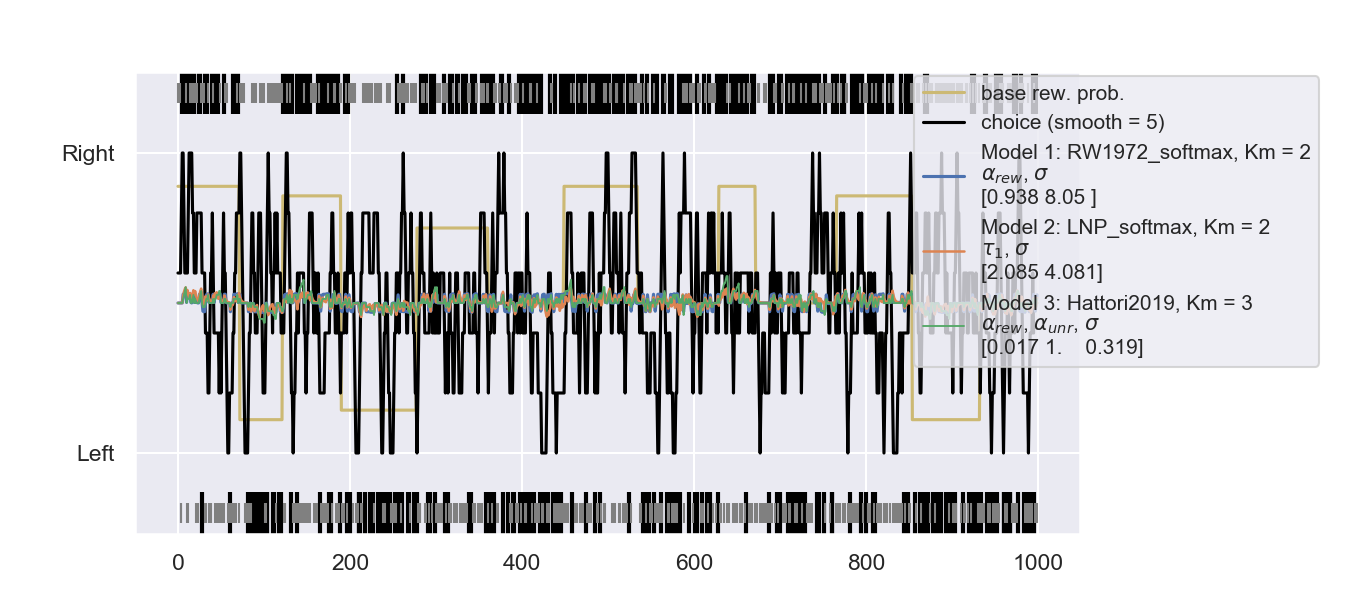

model  Km      AIC  log10_BF_AIC      BIC  log10_BF_BIC  \
5  RW1972_softmax   2  1388.52         -0.00  1398.33         -0.00   
3     LNP_softmax   2  1388.94         -0.09  1398.75         -0.09   
6     Hattori2019   3  1389.22         -0.15  1403.94         -1.22   
2     RW1972_epsi   2  1390.08         -0.34  1399.90         -0.34   
7        Bari2019   3  1390.42         -0.41  1405.14         -1.48   
8     Hattori2019   4  1390.84         -0.50  1410.47         -2.64   
4     LNP_softmax   4  1392.94         -0.96  1412.57         -3.09   
1    LossCounting   2  1402.49         -3.03  1412.30         -3.03   

                                        para_notation  \
5                            $\alpha_{rew}$, $\sigma$   
3                                  $\tau_1$, $\sigma$   
6            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   
2                          $\alpha_{rew}$, $\epsilon$   
7                  $\alpha_{rew}$, $\delta$, $\sigma$   
8  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
4          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
1                           $\mu_{LC}$, $\sigma_{LC}$   

                   para_fitted  
5                [0.938, 8.05]  
3               [2.085, 4.081]  
6          [0.017, 1.0, 0.319]  
2               [0.024, 0.992]  
7        [0.775, 0.126, 5.908]  
8     [0.007, 1.0, 0.0, 0.091]  
4  [2.085, 38.997, 1.0, 4.081]  
1                 [1.48, 10.0]

<IPython.core.display.Javascript object>


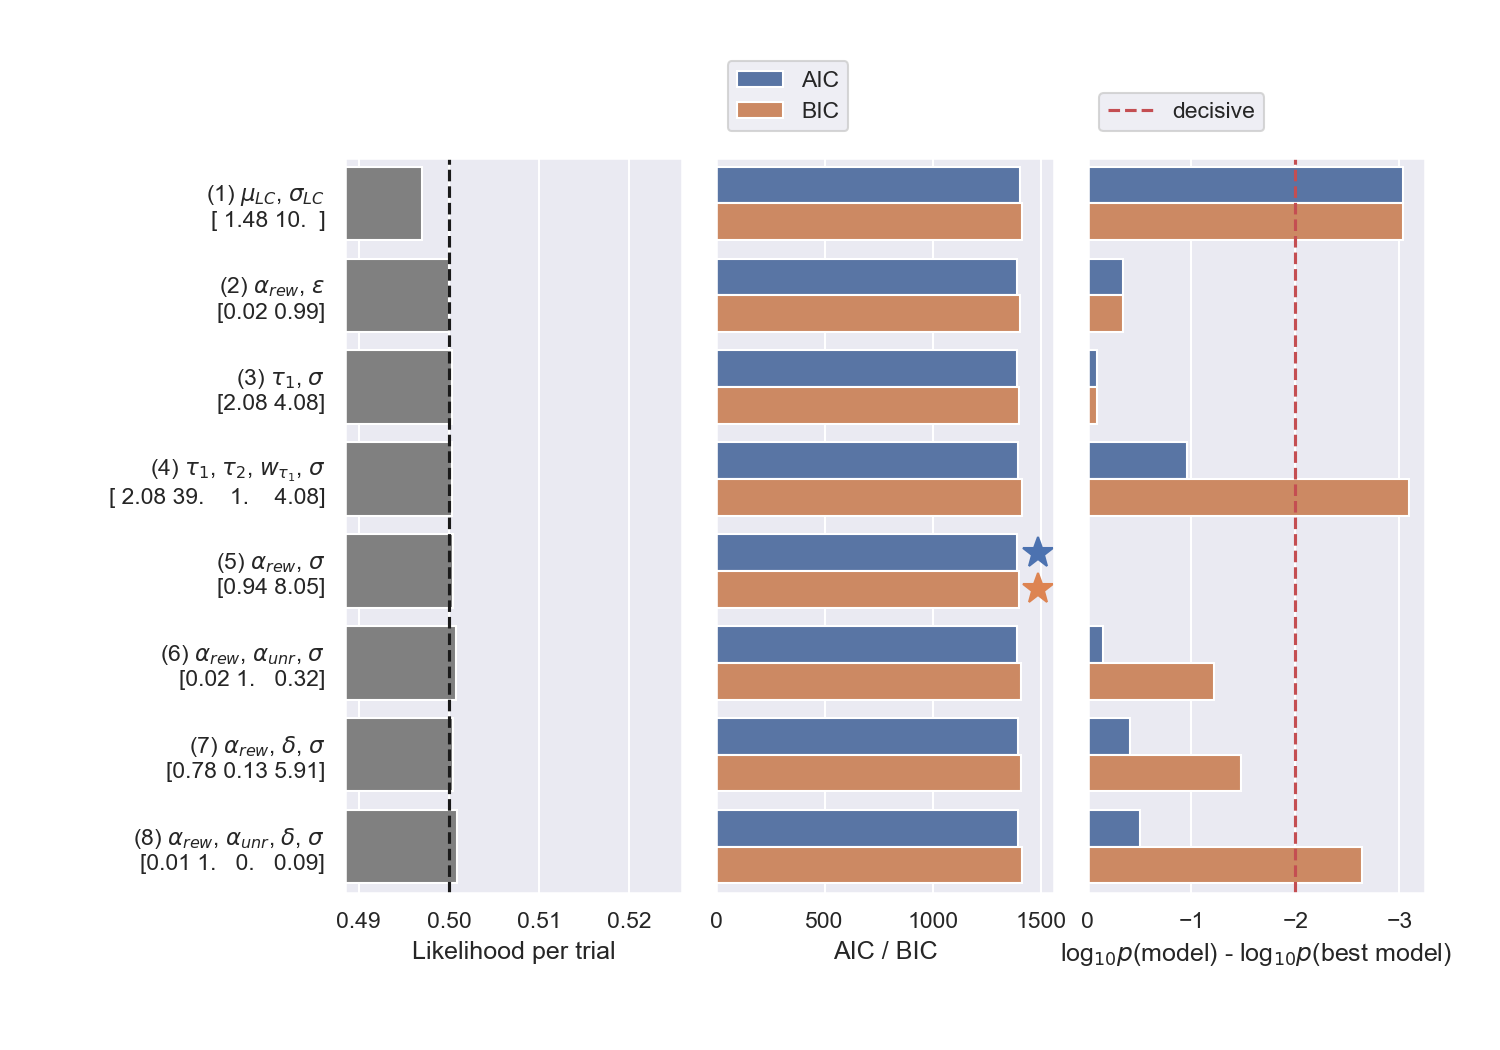

In [6]:
fake_data = generate_fake_data('Random', [],[], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(fake_data)
model_comparison.fit(pool = pool, plot_predictive=[1,2,3])  # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

Note that these models cannot differentiate IdealpHatGreedy and pMatching.

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1405.74, BIC = 1415.55 (done in 4.48 secs)
Model 2/8:     RW1972_epsi, Km = 2 ... AIC = 1383.39, BIC = 1393.21 (done in 2.51 secs)
Model 3/8:     LNP_softmax, Km = 2 ... AIC = 1154.84, BIC = 1164.65 (done in 3.85 secs)
Model 4/8:     LNP_softmax, Km = 4 ... AIC = 1158.84, BIC = 1178.47 (done in 6.78 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1371.19, BIC = 1381.01 (done in 2.33 secs)
Model 6/8:     Hattori2019, Km = 3 ... AIC = 1330.47, BIC = 1345.2 (done in 3.42 secs)
Model 7/8:        Bari2019, Km = 3 ... AIC = 1157.77, BIC = 1172.49 (done in 8.76 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1140.7, BIC = 1160.33 (done in 8.21 secs)


<IPython.core.display.Javascript object>


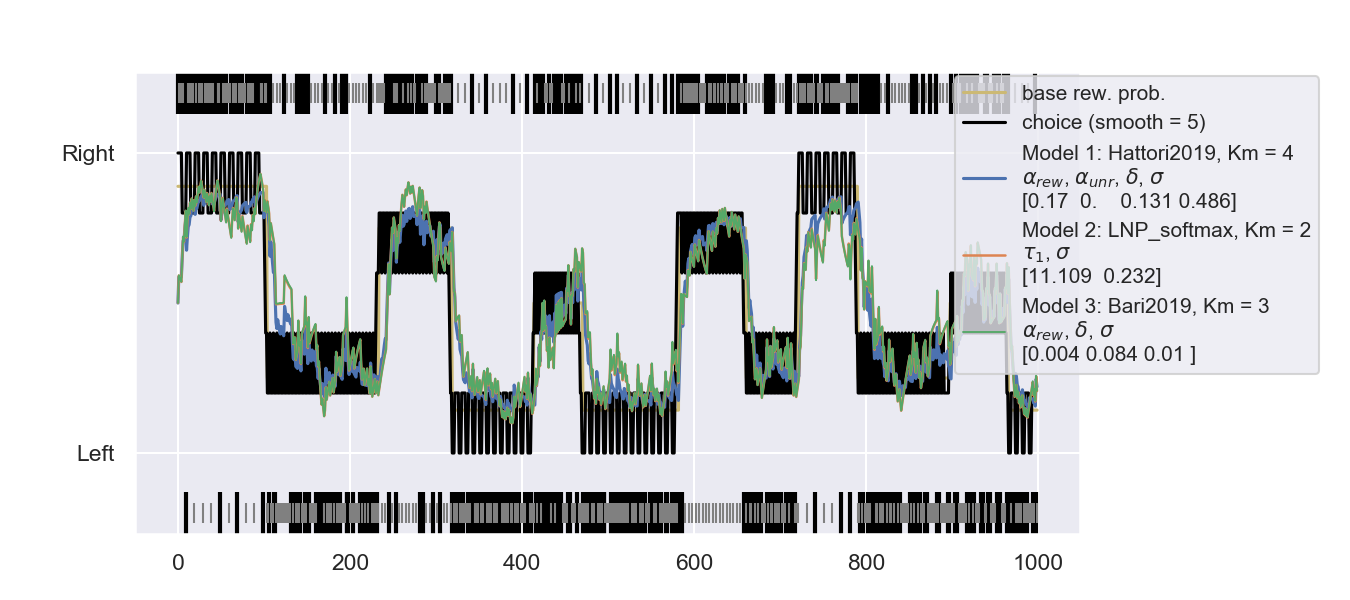

model  Km      AIC  log10_BF_AIC      BIC  log10_BF_BIC  \
8     Hattori2019   4  1140.70         -0.00  1160.33         -0.00   
3     LNP_softmax   2  1154.84         -3.07  1164.65         -0.94   
7        Bari2019   3  1157.77         -3.71  1172.49         -2.64   
4     LNP_softmax   4  1158.84         -3.94  1178.47         -3.94   
6     Hattori2019   3  1330.47        -41.21  1345.20        -40.14   
5  RW1972_softmax   2  1371.19        -50.05  1381.01        -47.92   
2     RW1972_epsi   2  1383.39        -52.70  1393.21        -50.57   
1    LossCounting   2  1405.74        -57.55  1415.55        -55.42   

                                        para_notation  \
8  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
3                                  $\tau_1$, $\sigma$   
7                  $\alpha_{rew}$, $\delta$, $\sigma$   
4          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
6            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   
5                            $\alpha_{rew}$, $\sigma$   
2                          $\alpha_{rew}$, $\epsilon$   
1                           $\mu_{LC}$, $\sigma_{LC}$   

                    para_fitted  
8     [0.17, 0.0, 0.131, 0.486]  
3               [11.109, 0.232]  
7          [0.004, 0.084, 0.01]  
4  [10.502, 11.109, 0.0, 0.232]  
6         [0.368, 0.007, 0.238]  
5                [0.119, 0.666]  
2                [0.349, 0.917]  
1                 [2.775, 10.0]

<IPython.core.display.Javascript object>


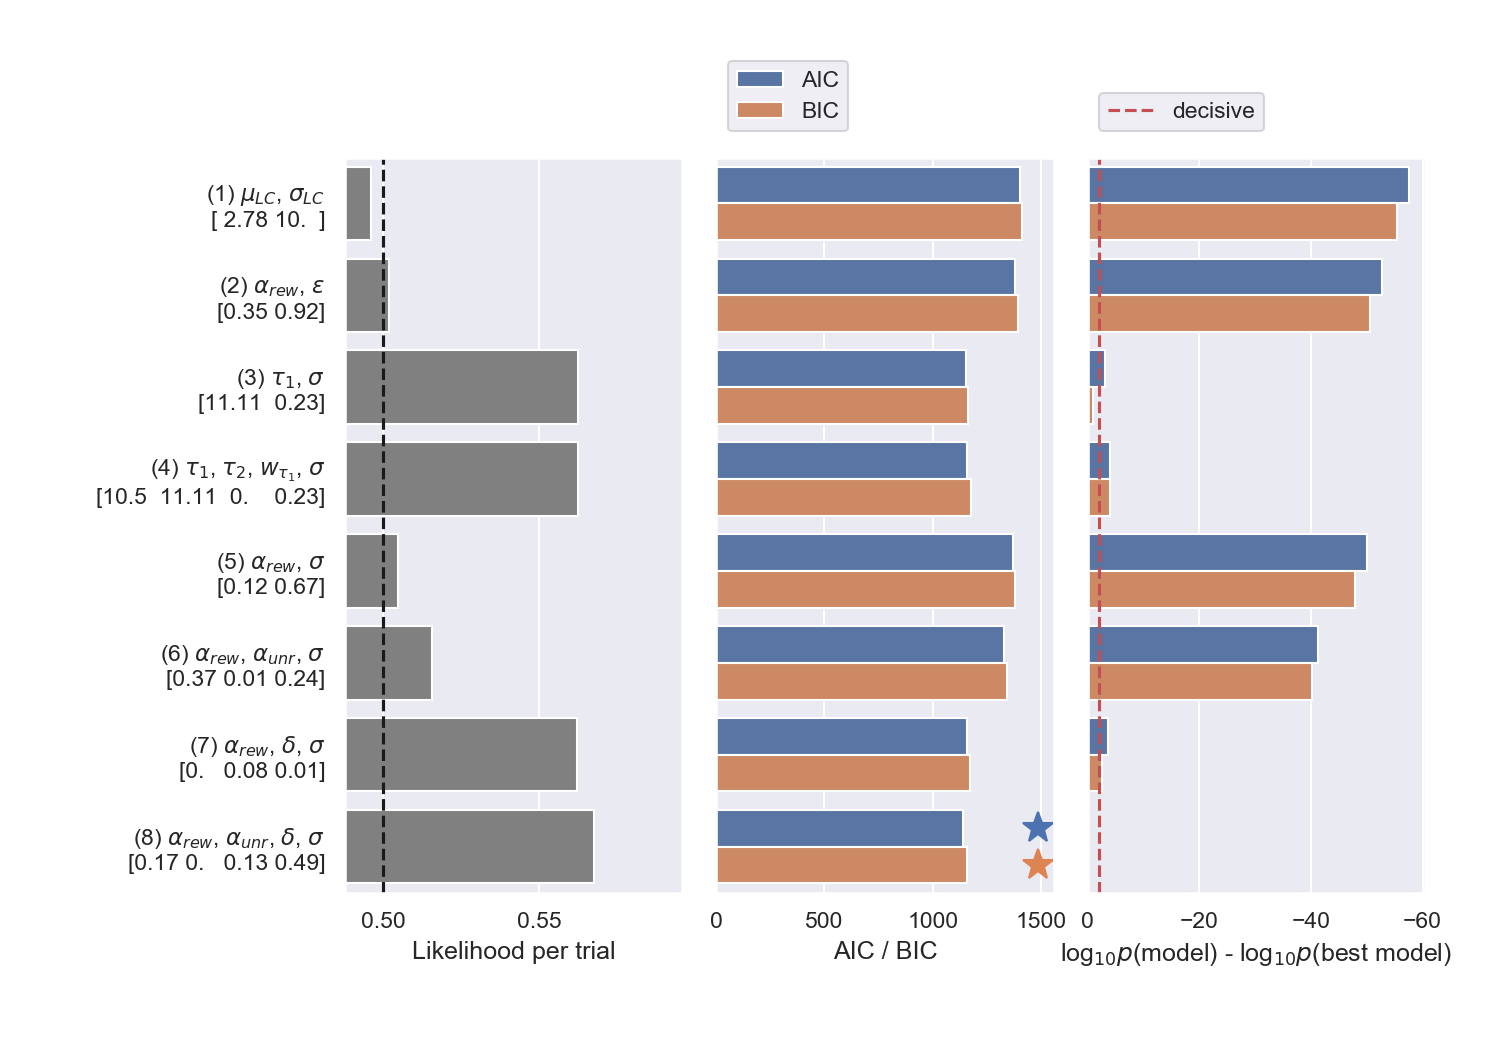

In [7]:
fake_data = generate_fake_data('IdealpHatGreedy', [],[], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(fake_data)
model_comparison.fit(pool = pool, plot_predictive=[1,2,3])  # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1378.93, BIC = 1388.75 (done in 5.27 secs)
Model 2/8:     RW1972_epsi, Km = 2 ... AIC = 1246.02, BIC = 1255.84 (done in 4.15 secs)
Model 3/8:     LNP_softmax, Km = 2 ... AIC = 1046.68, BIC = 1056.49 (done in 3.77 secs)
Model 4/8:     LNP_softmax, Km = 4 ... AIC = 1050.68, BIC = 1070.31 (done in 7.09 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1232.33, BIC = 1242.15 (done in 3.89 secs)
Model 6/8:     Hattori2019, Km = 3 ... AIC = 1229.4, BIC = 1244.12 (done in 4.76 secs)
Model 7/8:        Bari2019, Km = 3 ... AIC = 1050.32, BIC = 1065.04 (done in 9.44 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1017.16, BIC = 1036.79 (done in 6.95 secs)


<IPython.core.display.Javascript object>


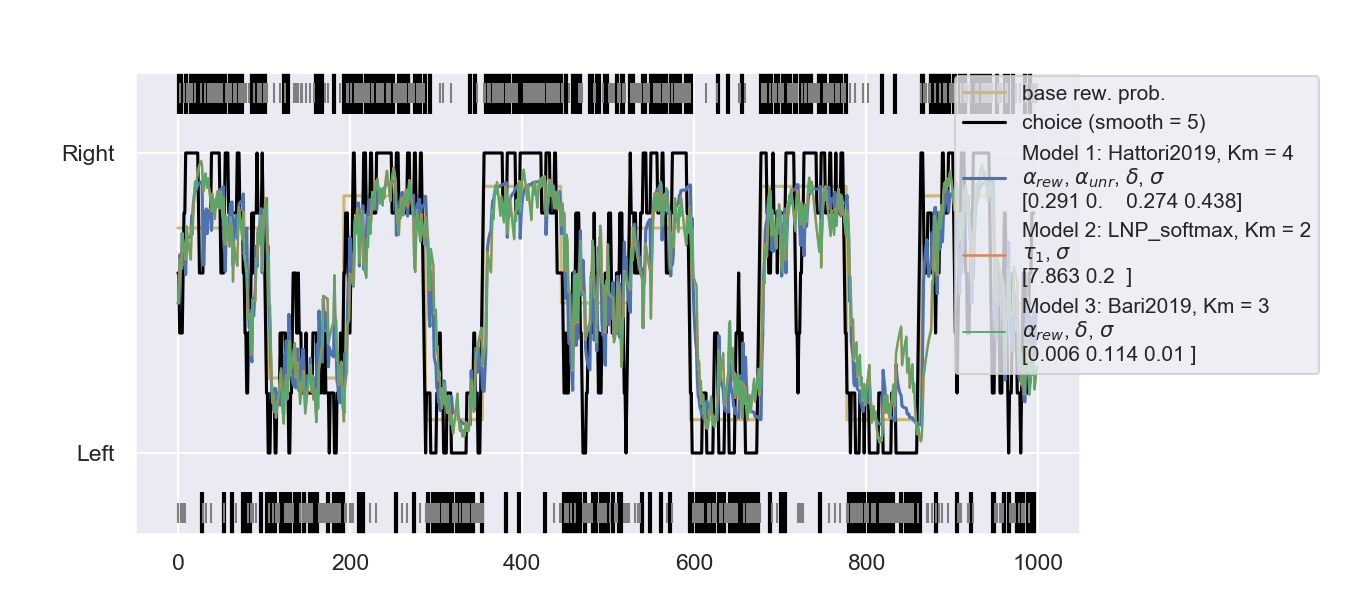

model  Km      AIC  log10_BF_AIC      BIC  log10_BF_BIC  \
8     Hattori2019   4  1017.16         -0.00  1036.79         -0.00   
3     LNP_softmax   2  1046.68         -6.41  1056.49         -4.28   
7        Bari2019   3  1050.32         -7.20  1065.04         -6.13   
4     LNP_softmax   4  1050.68         -7.28  1070.31         -7.28   
6     Hattori2019   3  1229.40        -46.09  1244.12        -45.02   
5  RW1972_softmax   2  1232.33        -46.72  1242.15        -44.59   
2     RW1972_epsi   2  1246.02        -49.70  1255.84        -47.57   
1    LossCounting   2  1378.93        -78.56  1388.75        -76.43   

                                        para_notation  \
8  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
3                                  $\tau_1$, $\sigma$   
7                  $\alpha_{rew}$, $\delta$, $\sigma$   
4          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
6            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   
5                            $\alpha_{rew}$, $\sigma$   
2                          $\alpha_{rew}$, $\epsilon$   
1                           $\mu_{LC}$, $\sigma_{LC}$   

                  para_fitted  
8  [0.291, 0.0, 0.274, 0.438]  
3                [7.863, 0.2]  
7        [0.006, 0.114, 0.01]  
4   [7.863, 11.154, 1.0, 0.2]  
6       [0.006, 0.079, 0.021]  
5              [0.058, 0.131]  
2              [0.056, 0.625]  
1               [8.921, 10.0]

<IPython.core.display.Javascript object>


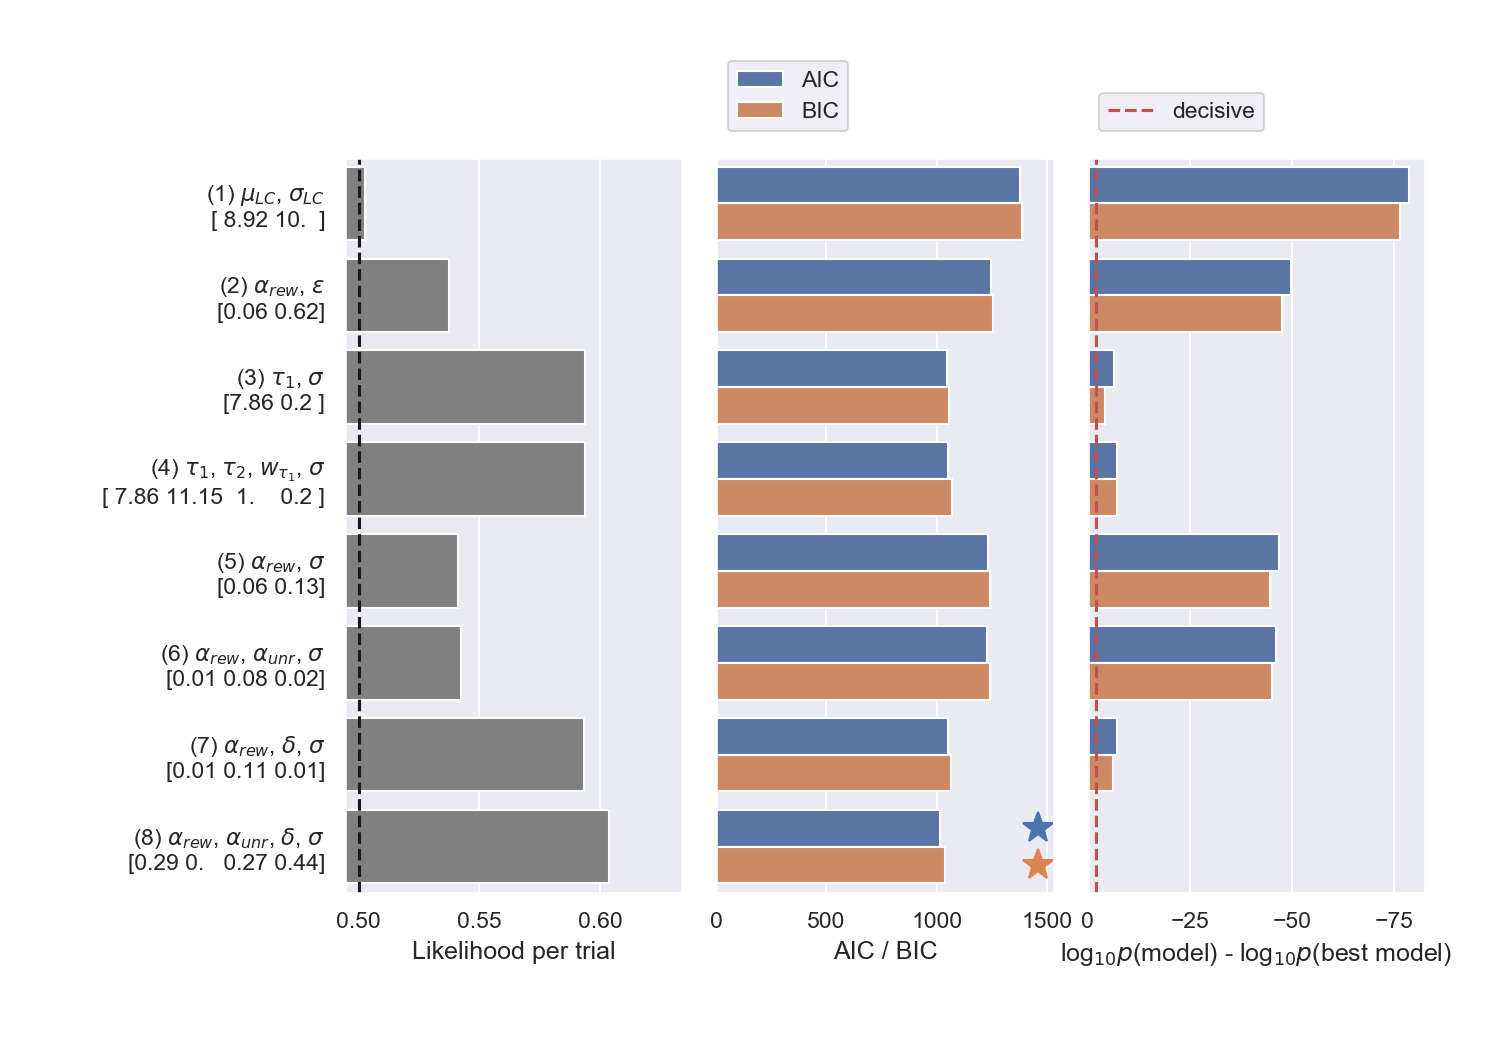

In [8]:
fake_data = generate_fake_data('pMatching', [],[], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(fake_data)
model_comparison.fit(pool = pool, plot_predictive=[1,2,3])  # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

# 2. Confusion matrix and Inversion matrix

## 2.1 Default settings

The range for generating parameters:

```python
def generate_random_para(para_name):
    # With slightly narrower range than fitting bounds in BanditModelComparison
    if para_name in 'loss_count_threshold_mean':
        return np.random.uniform(0, 30)
    elif para_name in 'loss_count_threshold_std':
        return np.random.uniform(0, 5)
    elif para_name in ['tau1', 'tau2']:
        return 10**np.random.uniform(0, np.log10(30)) 
    elif para_name in ['w_tau1', 'learn_rate_rew', 'learn_rate_unrew', 'forget_rate', 'epsilon']:
        return np.random.uniform(0, 1)
    elif para_name in 'softmax_temperature':
        return 1/np.random.exponential(10)
```

<font size=3>Don't try to rerun this... It took 9.5 hours!

In [6]:
models = [
            ['LossCounting', ['loss_count_threshold_mean', 'loss_count_threshold_std'], [0,0], [40,10]],                   
            ['RW1972_epsi', ['learn_rate_rew', 'epsilon'],[0, 0],[1, 1]],
            ['LNP_softmax',  ['tau1', 'softmax_temperature'], [1e-3, 1e-2], [100, 15]],                 
            ['LNP_softmax', ['tau1', 'tau2', 'w_tau1', 'softmax_temperature'],[1e-3, 1e-1, 0, 1e-2],[15, 40, 1, 15]],                 
            ['RW1972_softmax', ['learn_rate_rew', 'softmax_temperature'],[0, 1e-2],[1, 15]],
            ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'softmax_temperature'],[0, 0, 1e-2],[1, 1, 15]],
            ['Bari2019', ['learn_rate_rew', 'forget_rate', 'softmax_temperature'],[0, 0, 1e-2],[1, 1, 15]],
            ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'forget_rate', 'softmax_temperature'],[0, 0, 0, 1e-2],[1, 1, 1, 15]],
         ]

compute_confusion_matrix(models = models, n_runs = 100, n_trials = 1000, pool = pool)

Runs: 100%|███████████████████████████████████████████████████████████████████████| 100/100 [9:32:03<00:00, 343.23s/it]


Load results and plot

<IPython.core.display.Javascript object>


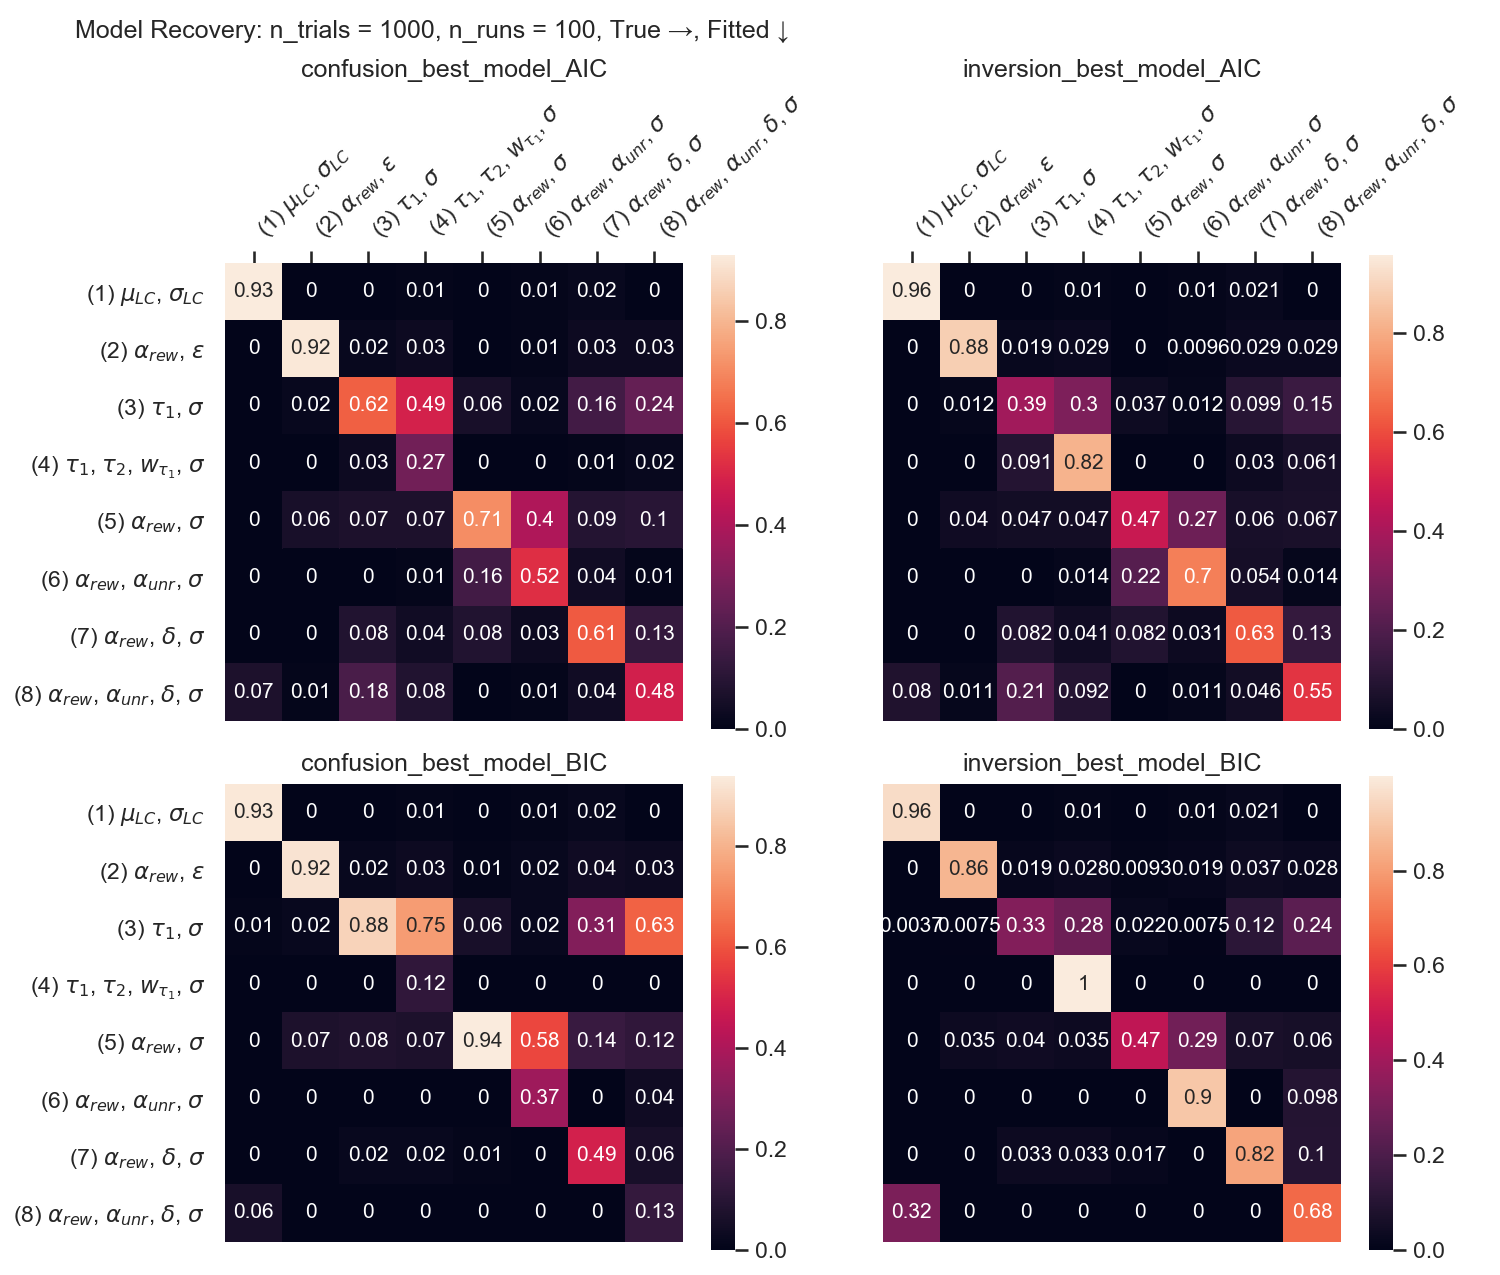

<IPython.core.display.Javascript object>


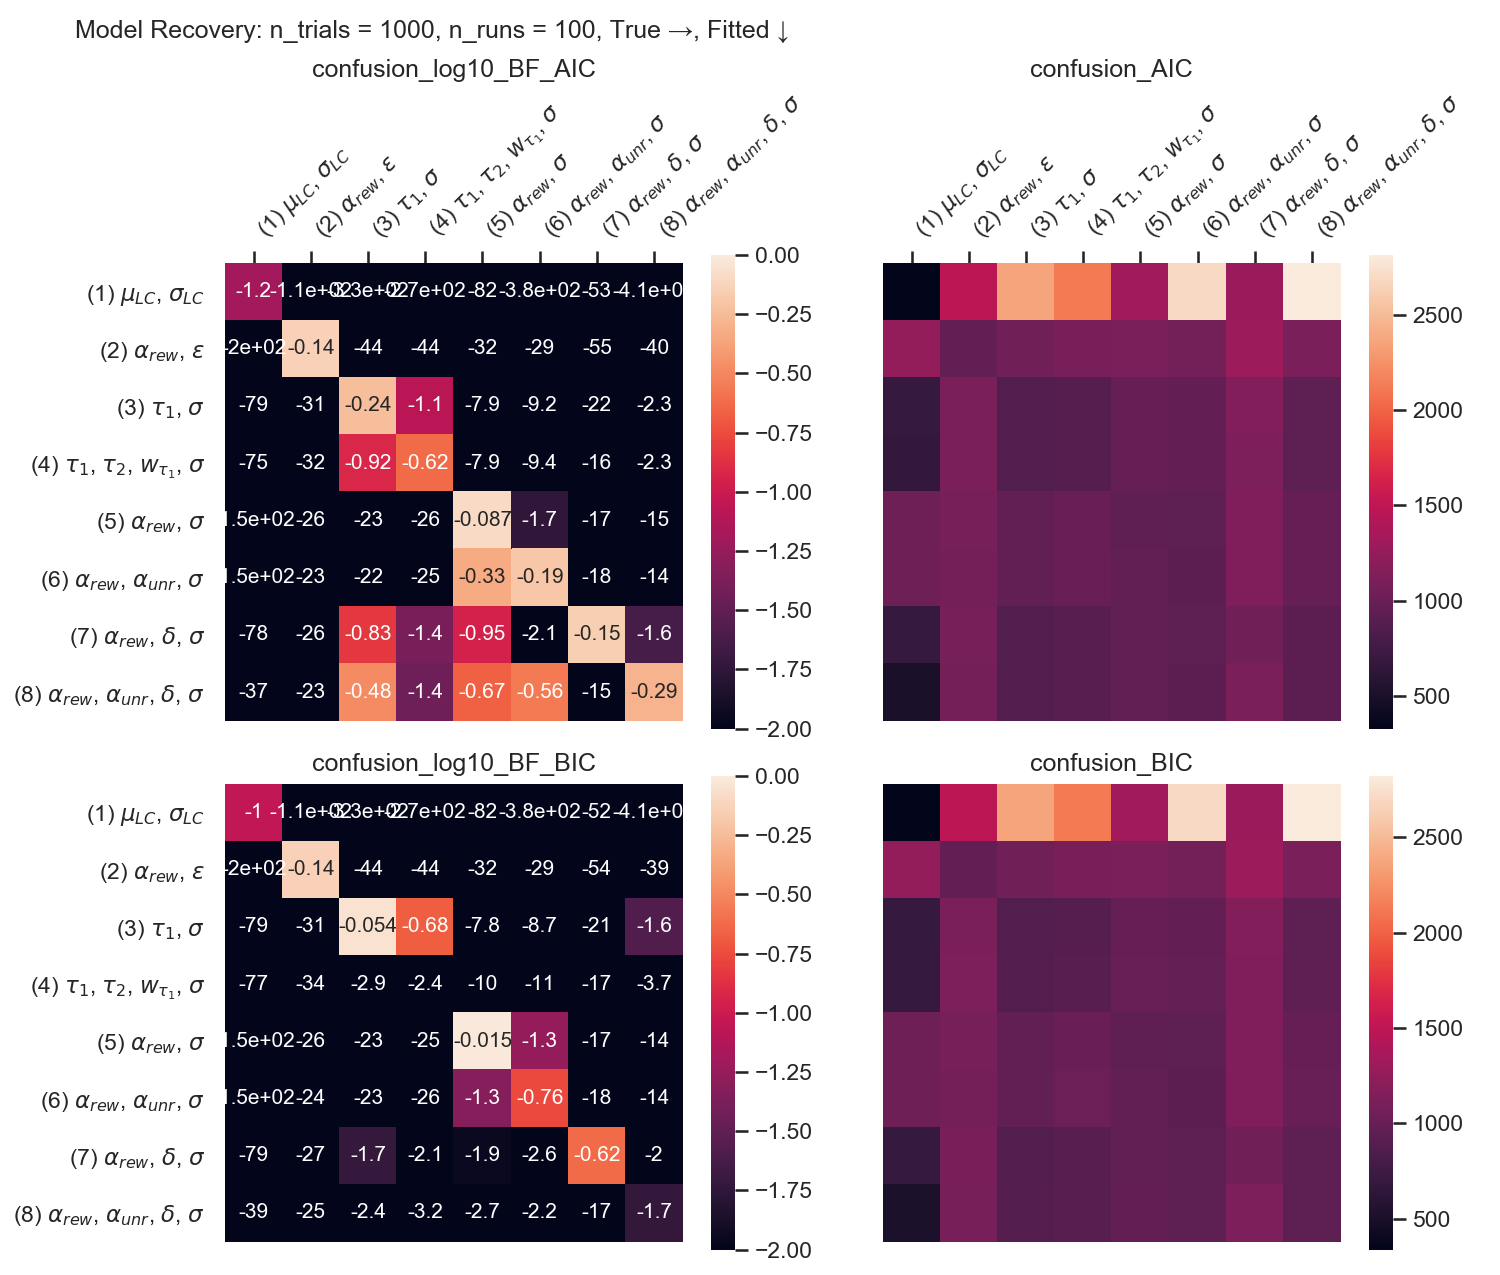

In [12]:
from plot_fitting import plot_confusion_matrix
confusion_results = pickle.load(open(".\\results\\confusion_results_1_100_1000.p", "rb"))
plot_confusion_matrix(confusion_results, order = [1,4,2,3,5,7,6,8])

Finally we got this! As expected, AIC looks better. <br>

1. The crosstalk between models are highly correlated with their similarities:

- [4,3]: When $\tau_1=\tau_2$, model (4) --> (3)
- [6,5] and [8,7]: When $\alpha_{unr} = \alpha_{rew}$, model (6) --> (5), model (8) --> (7)
- [7,3] and [8,3]: When $\delta = \alpha$, RL-like --> local INCOME in LNP!

2.  The model (3) $\tau_1, \sigma$ (Sugrue 2004) is the most volatile one. Because it's simple.
3.  Compare (3) and (5) --> INCOME and RETURN are different. 
4.  Compare (2) and (5) --> $\epsilon$ and $\sigma$ are different.

## 2.2 Fewer trial numbers

I wanted to increase the trial number, but too slow. So try fewer trials...

In [7]:
models = [
            ['LossCounting', ['loss_count_threshold_mean', 'loss_count_threshold_std'], [0,0], [40,10]],                   
            ['RW1972_epsi', ['learn_rate_rew', 'epsilon'],[0, 0],[1, 1]],
            ['LNP_softmax',  ['tau1', 'softmax_temperature'], [1e-3, 1e-2], [100, 15]],                 
            ['LNP_softmax', ['tau1', 'tau2', 'w_tau1', 'softmax_temperature'],[1e-3, 1e-1, 0, 1e-2],[15, 40, 1, 15]],                 
            ['RW1972_softmax', ['learn_rate_rew', 'softmax_temperature'],[0, 1e-2],[1, 15]],
            ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'softmax_temperature'],[0, 0, 1e-2],[1, 1, 15]],
            ['Bari2019', ['learn_rate_rew', 'forget_rate', 'softmax_temperature'],[0, 0, 1e-2],[1, 1, 15]],
            ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'forget_rate', 'softmax_temperature'],[0, 0, 0, 1e-2],[1, 1, 1, 15]],
         ]

compute_confusion_matrix(models = models, n_runs = 50, n_trials = 500, pool = pool, save_file = 'confusion_results_2_50_500.p')

Runs: 100%|█████████████████████████████████████████████████████████████████████████| 50/50 [2:58:58<00:00, 214.76s/it]


<IPython.core.display.Javascript object>


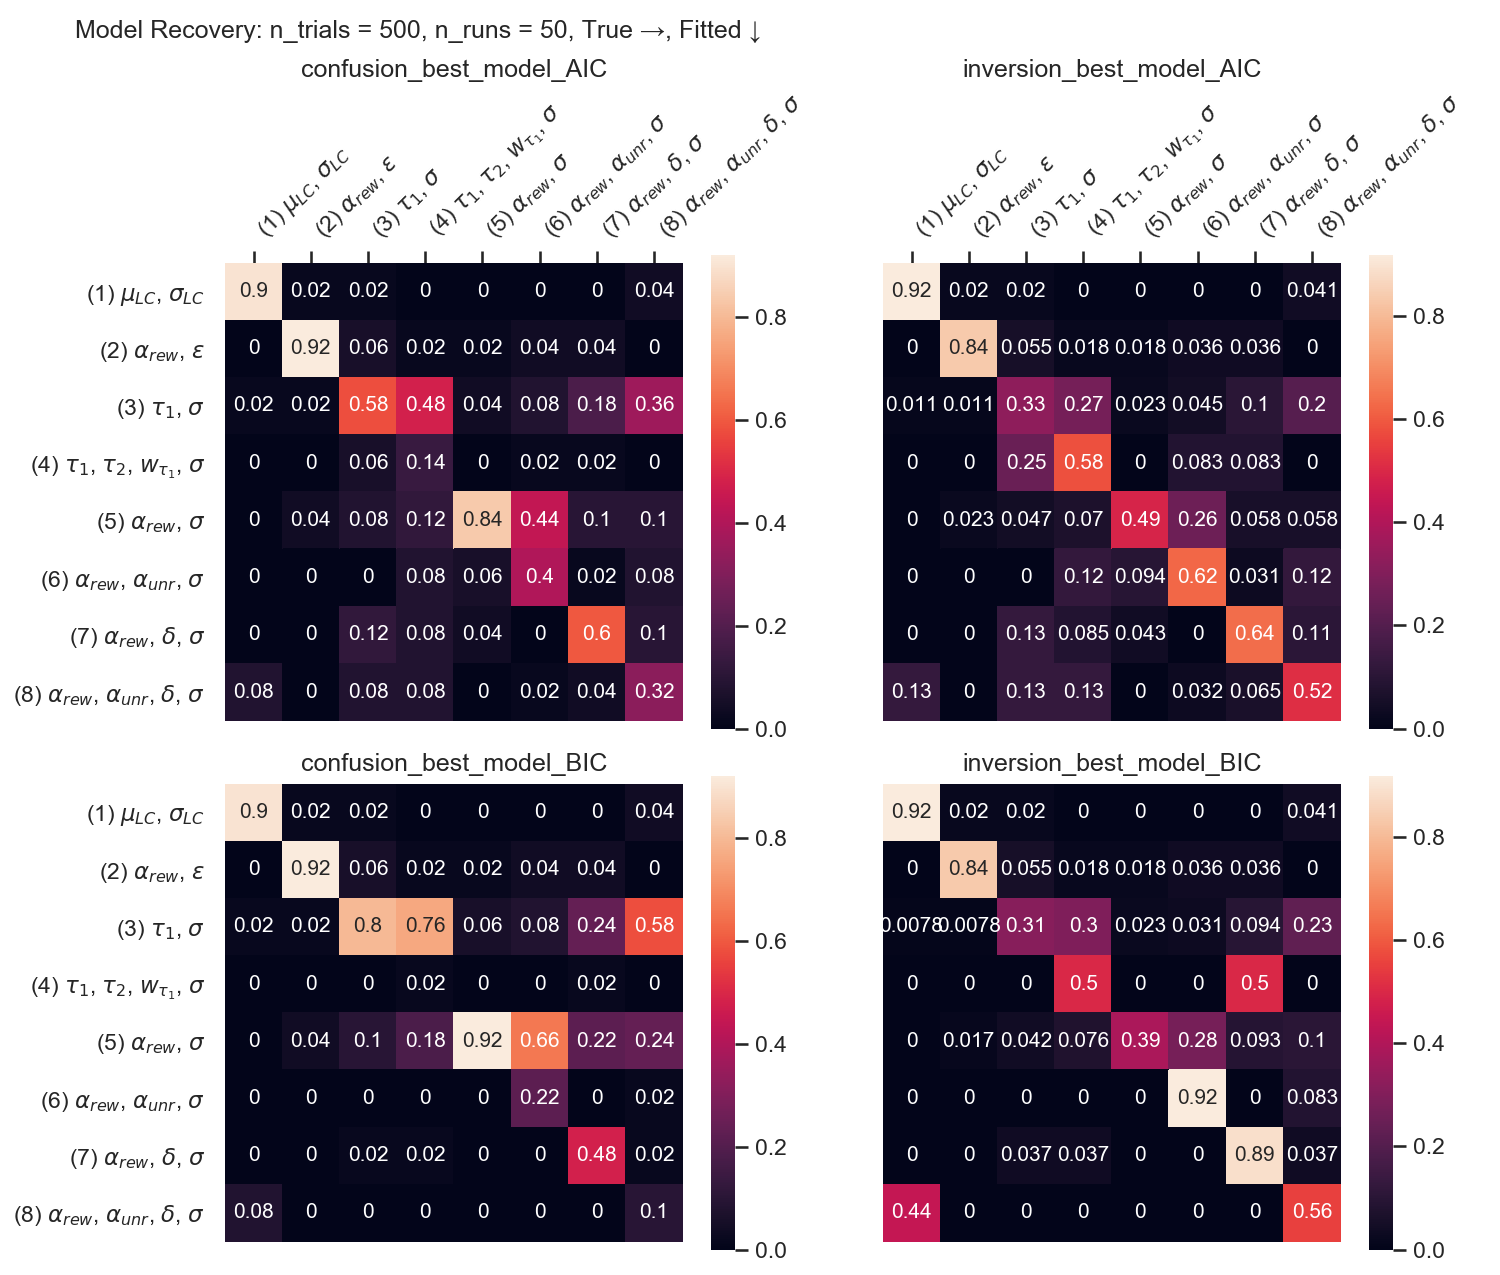

<IPython.core.display.Javascript object>


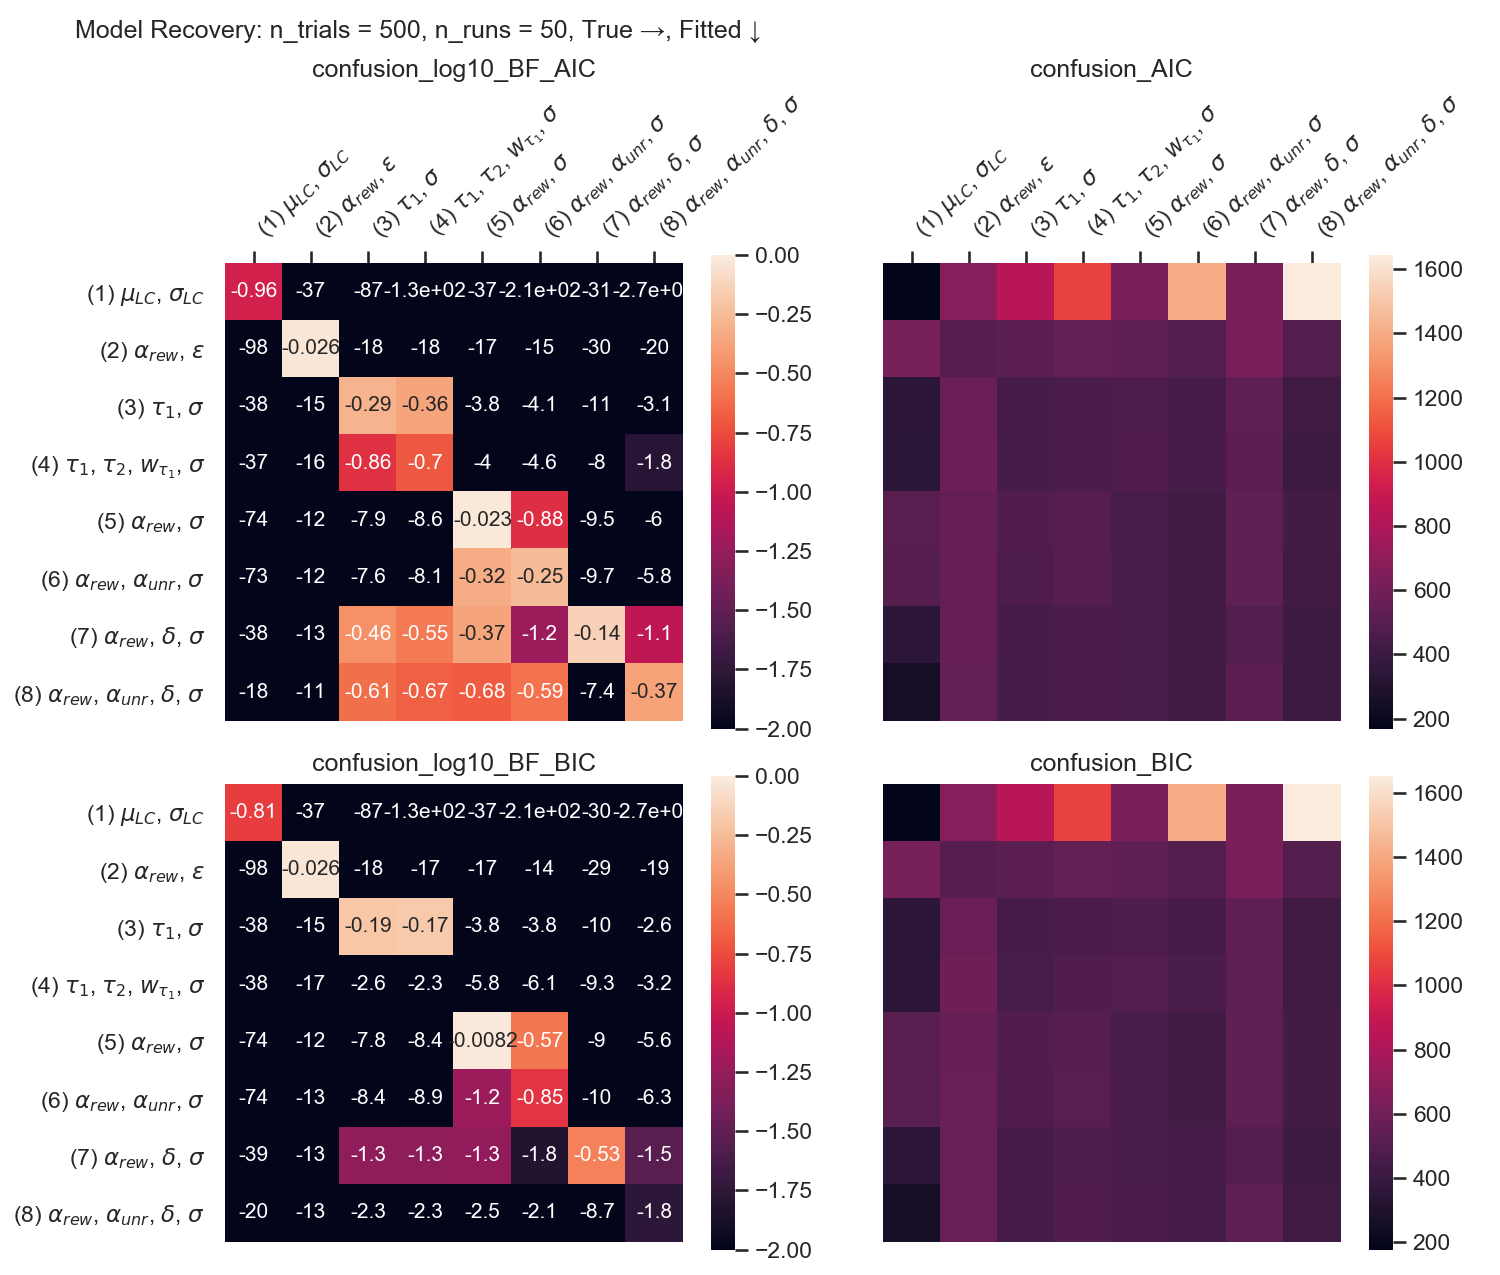

In [10]:
confusion_results = pickle.load(open(".\\results\\confusion_results_2_50_500.p", "rb"))
plot_confusion_matrix(confusion_results)

# 3. Add bias terms (important for real data)